In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager

#loads in all three datasets
fires = pd.read_csv("data/fires.csv")
chip = pd.read_csv("data/CrimeRate.csv")
humps = pd.read_csv("data/speedhumps.csv")


In [25]:
#creates dictionaries for each metric

#humps dictionary
hph = {}
hoods = []
nums = []

for index, row in humps.iterrows():
    hood = row["neighborhood"]
    if hood in hph:
        hph[hood] += 1
    else:
        hph[hood] = 1
        
for i in hph:
    hoods.append(i)
    nums.append(hph[i])
    
hph = {"Neighborhood":hoods, "Humps":nums}


#fires dictionary
fire_count = {}

for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood in fire_count:
        fire_count[neighborhood] += 1
    elif neighborhood not in fire_count and neighborhood != None and neighborhood in hoods:
        fire_count[neighborhood] = 1

#crime dictionary
crime_dict = {}
dict_count = {}
for index, row in chip.iterrows():
    cur_hood = row['INCIDENTNEIGHBORHOOD']
    if cur_hood in crime_dict:
        crime_dict[cur_hood] = crime_dict.get(cur_hood) + row['HIERARCHY']
        dict_count[cur_hood] = dict_count.get(cur_hood) + 1
    elif cur_hood not in crime_dict and cur_hood in hoods:
        crime_dict[cur_hood] = row['HIERARCHY']
        dict_count[cur_hood] = 1
        
mean = {}
for (k,v), (k2,v2) in zip(crime_dict.items(), dict_count.items()):
     mean[k] = v/v2



Text(0.5, 1.0, 'Humps per Hood in Pittsburgh, PA')

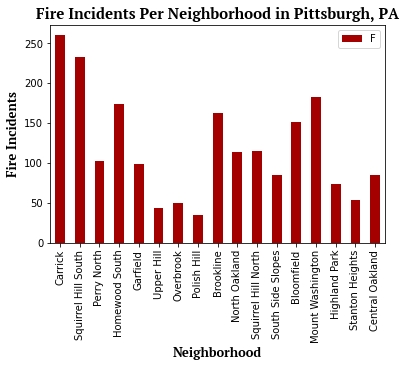

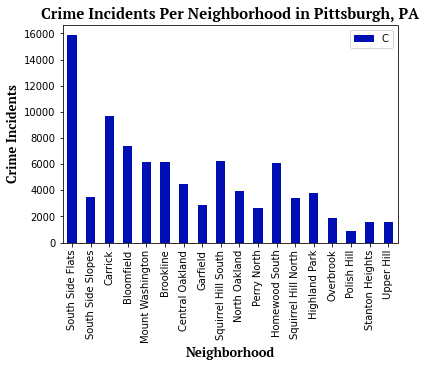

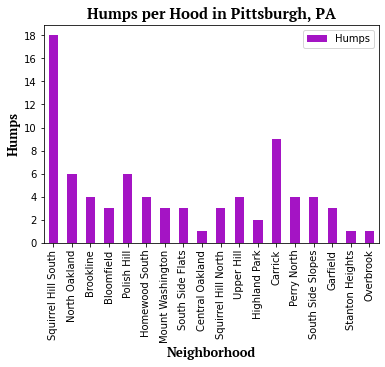

In [28]:
#turns our dictionaries into dataframes for easier manipulation

#fires dataframe
graph = pd.DataFrame.from_dict(fire_count, orient='index', dtype = None, columns=None)
graph = graph.iloc[1: , :]
graph.plot.bar(color="#A50000")
plt.ylabel("Fire Incidents", fontweight="bold", fontname="PT Serif", fontsize=13)
plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
plt.title("Fire Incidents Per Neighborhood in Pittsburgh, PA", fontweight="bold", fontname="PT Serif", fontsize=15)

#crime dataframes
count_df = pd.DataFrame.from_dict(dict_count, orient = 'index')
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')
count_df.plot.bar(color="#000FB4")
plt.ylabel("Crime Incidents", fontweight="bold", fontname="PT Serif", fontsize=13)
plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
plt.title("Crime Incidents Per Neighborhood in Pittsburgh, PA", fontweight="bold", fontname="PT Serif", fontsize=15)

#humps dataframe
graphHumps = pd.DataFrame.from_dict(hph)
graphHumps.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
plt.yticks([0,2,4,6,8,10,12,14,16,18,])
plt.ylabel("Humps", fontweight="bold", fontname="PT Serif", fontsize=13)
plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
plt.title("Humps per Hood in Pittsburgh, PA", fontweight="bold", fontname="PT Serif", fontsize=15)


In [4]:
#Fix the indexing for crime and fire dataframes since they index by neighborhood
graph.reset_index(inplace=True)
graph = graph.rename(columns = {'index':'Neighborhood'})

count_df.reset_index(inplace=True)
count_df = count_df.rename(columns = {'index':'Neighborhood'})

graphHumps = graphHumps.reset_index(drop=True)

In [5]:
#print(graph["Neighborhood"].head())
#print(graphHumps["Neighborhood"].head())
#graphHumpHood = graph == graphHumps

ni = False
hi = len(graph["Neighborhood"])

for i in range(0, hi):
    for n in hoods:
        if n == graph["Neighborhood"].loc[i]:
            ni = True
    if ni != True:
        graph = graph.drop(graph.index[i])
    ni = False
    print("success")

print(graph)

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
           Neighborhood    0
0               Carrick  260
1   Squirrel Hill South  233
2           Perry North  102
3        Homewood South  174
4              Garfield   98
5            Upper Hill   44
6             Overbrook   50
7           Polish Hill   35
8             Brookline  163
9         North Oakland  114
10  Squirrel Hill North  115
11    South Side Slopes   85
12           Bloomfield  151
13     Mount Washington  183
14        Highland Park   73
15      Stanton Heights   54
16      Central Oakland   85
